<a href="https://colab.research.google.com/github/shuyao-li/sy/blob/master/Homework5_small_models_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small models with tensorflow

### Import

In [0]:
%reset -f

In [0]:
import numpy as np
import pandas as pd
import os
import sklearn.linear_model
import tensorflow as tf
"reset tensorflow computation tree"
tf.reset_default_graph()

import matplotlib.pyplot as plt
plt.style.use("default")

np.set_printoptions(linewidth=500,precision=2,suppress=True)

"do not look at this function otherwise you spoil an exercise"
def generate_nid(prop=(1,1,1)):
    nb_data=1000
    prop=np.array(prop)
    proba=prop/prop.sum()
    cats=np.random.choice(a=[0,1,2],p=proba,size=nb_data)
    
    cat_0=(cats==0)
    cat_1=(cats==1)
    cat_2=(cats==2)
    
    y=np.empty(nb_data)
    y[cat_0]=np.random.normal(loc=45,scale=5.123,size=np.sum(cat_0))
    y[cat_1]=np.random.normal(loc=16,scale=1.123,size=np.sum(cat_1))
    y[cat_2]=np.random.normal(loc=32,scale=3.123,size=np.sum(cat_2))
    
    y=np.maximum(y,0)
    
    return y



## Linear regression

### Create some data

In [0]:
def genere_data_quant(nbData):
    """génération des données:
       Y=  X @ a + b + bruit
        """
    X = np.random.normal(size=(nbData, 2))
    a = np.array([3.,4.]).reshape((2,1))
    print(a)
    b = 1.
    Y = X @ a + b + np.random.normal(loc=0, scale=0.1, size=(nbData,1))
    return X,Y


X, Y = genere_data_quant(100)

X.shape, Y.shape

[[3.]
 [4.]]


((100, 2), (100, 1))

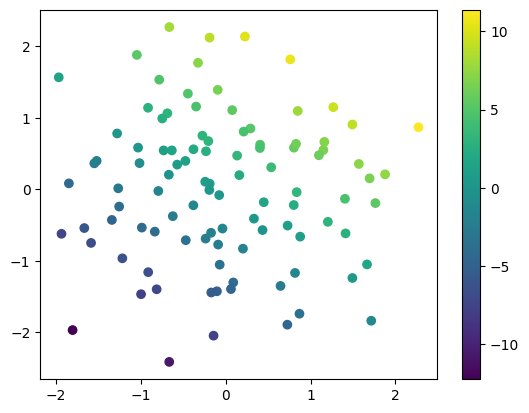

In [0]:
fig,ax=plt.subplots()
mappable=ax.scatter(X[:,0],X[:,1],c=Y[:,0]);
fig.colorbar(mappable);

### Use tensorflow for linear regression


Tensorflow objects has an underscore. Feedable data has the underscore afterward. 

In [0]:

"""2 placeholders for input and output of the model"""

## shape = (None, 2). None: can be of any size
X_ = tf.placeholder( shape=(100,2), dtype=tf.float32)
Y_ = tf.placeholder( shape=(100,1), dtype=tf.float32)

""" 2 trainable parameters"""
_a = tf.Variable( [[2.],[8.]])
_b = tf.Variable( 1.)

"model"
# Compute the equation of the model link outputs to the inputs of your model
_Y_hat = tf.add((X_ @ _a), _b)

"loss"
# Compute the loss for parameter learning
## for regression model, use the Mean-Squared_Error as loss function
_loss = tf.reduce_mean(tf.square(_Y_hat - Y))


" create minimization operations"
# Nothing to be done here

## define the learning rate: 0.1
_trainProcess = tf.train.AdamOptimizer(0.1).minimize(_loss)

loss: [17.659565, 16.625938, 15.648396, 14.708268, 13.807696, 12.951822, 12.14195, 11.375646, 10.649936, 9.963853, 9.317337, 8.709443, 8.137605, 7.5982323, 7.08802, 6.6045637, 6.1459913, 5.710391, 5.2956123, 4.8996367, 4.5211678, 4.1598, 3.8156412, 3.488825, 3.1793048, 2.8869932, 2.6120243, 2.3547354, 2.1154008, 1.8939661, 1.6900101, 1.5029415, 1.3321702, 1.1770873, 1.0369136, 0.9106337, 0.79710144, 0.6952179, 0.6040141, 0.5225903, 0.45003834, 0.38545695, 0.32805127, 0.27719212, 0.23237275, 0.19311766, 0.15895002, 0.12943089, 0.10419449, 0.08292083]
prediction of parameter a:
 [[2.97]
 [4.24]]
prediction of parameter b:
 0.9929201


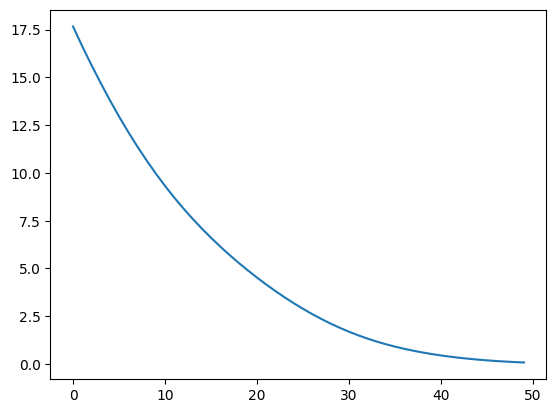

In [0]:
"""Monitor the loss while training"""
# Nothing to be done here
losses = []


with tf.Session() as sess:
    # initialization of the variables of the computation graph
    # Nothing to be done
    sess.run(tf.global_variables_initializer())
    # 
    for itr in range(50):
        # Decide what to compute at each training step
        _, curr_loss =  sess.run([_trainProcess, _loss], {X_: X, Y_: Y})
        # put the loss at this iteration inside a list for further plot
        losses.append(curr_loss)
    # Final value of the parameter after training    
    print("loss:", losses)
    print("prediction of parameter a:\n", sess.run(_a))
    print("prediction of parameter b:\n", sess.run(_b))

# plot curve of the loss while training
# Nothing to be done here            
plt.plot(losses);



##  Classification $\hookleftarrow$

### Data

In [0]:
"the moons dataset using Scikit-Learn's"
from sklearn.datasets import make_moons
m = 1000
X, Y = make_moons(m, noise=0.1, random_state=42)
Y = Y[:,np.newaxis]
X.shape,Y.shape

((1000, 2), (1000, 1))


## Splitting into training and validation sets

In [0]:
# Nothing to be done in that cell

## 20% of X in validation set
val_size = int(len(X) * 0.2)
X_train = X[:-val_size]
Y_train = Y[:-val_size]

X_val = X[-val_size:]
Y_val = Y[-val_size:]

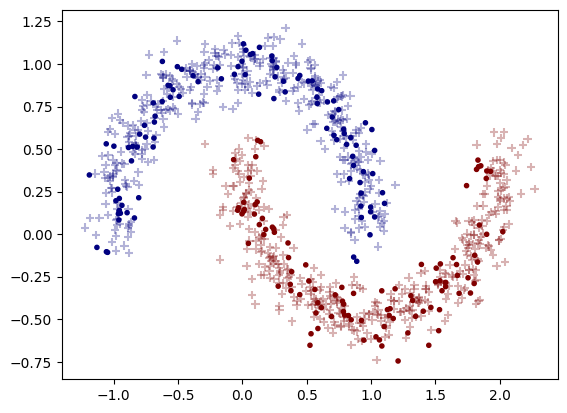

In [0]:
# Nothing to be done in that cell, just understand the dataset
fig,ax=plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1],c=Y_train[:,0],cmap="jet",marker="+",alpha=0.3);
ax.scatter(X_val[:,0],X_val[:,1],c=Y_val[:,0],cmap="jet",marker=".");

Une petite fonction pour générer les batch. On utilise la technique du fénéant: on tire des batchs aléatoires. Ainsi certaines données passeront plus que d'autres. En pratique, ce n'est pas très génant. 

In [0]:
def random_batch(X_train, Y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    Y_batch = Y_train[rnd_indices]
    return X_batch, Y_batch

In [0]:
X_batch, Y_batch = random_batch(X_train, Y_train, 5)
X_batch.shape,Y_batch.shape

((5, 2), (5, 1))

### Binary logistic model

Probability to belong to class 1 is estimated by:
$$
\hat p = \sigma(X \cdot w +b)
$$
where $\sigma$ is the sigmoid function

In [0]:
n_inputs = 2
n_hidden = 40

X_ = tf.placeholder(tf.float32, shape=(None, n_inputs))
Y_ = tf.placeholder(tf.float32, shape=(None, 1))
_w = tf.Variable(tf.random_uniform([n_inputs, 1], -0.1, 0.1))
_b = tf.Variable(0.1)
_logits = X_ @ _w + _b
_Y_proba = tf.sigmoid(_logits)  #ou bien:  1 / (1 + tf.exp(-_logits))



Chosen loss:

$loss = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y_i \log\left(\hat{p}_i\right) + (1 - y_i) \log\left(1 - \hat{p}_i\right)\right]}$


In [0]:
_loss = tf.losses.log_loss(Y_, _Y_proba)  # Nothing to be done here


# ## why epsilon: avoid inside(log) <= 0
# epsilon = 1e-7
# _loss = - tf.reduce_mean(Y_ * tf.log(_Y_hat + epsilon) + (1 - Y_) * tf.log(1 - _Y_hat + epsilon))

# ### or use the function tf.clip_by_value: Clips tensor values to a specified min and max.
# # _loss = -tf.reduce_mean(Y_ * tf.log(tf.clip_by_value(_Y_hat, 1e-10, 1.0)) + (1 - Y_) * tf.log(tf.clip_by_value(1 - _Y_hat, 1e-10, 1.0)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Operations to minimize the loss



In [0]:
# Nothing to be done here
learning_rate = 0.07
_training_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(_loss)

In [0]:
# batch size and number of batches to yield during the training
batch_size = 200
n_batches = m // batch_size

# monitoring things (nothing to be done)
losses_val=[]
ite_val=[]
losses_train=[]
ite_train=[]

# Computation graph initialization
sess=tf.Session()
sess.run(tf.global_variables_initializer())
# Starting iteration
ite=0

Now for t:

In [0]:
# one epoch => see the whole dataset
for epoch in range(2000):
    # loop on every batch in the dataset
    for batch_index in range(n_batches):
        ite+=1
        # get batch data
        X_batch, Y_batch = random_batch(X_train, Y_train, batch_size)
        # training: feed the model with data and extract the monitoring metrics
        _, curr_loss = sess.run([_training_op, _loss], feed_dict = {X_: X_batch, Y_: Y_batch})
        losses_train.append(curr_loss)
        ite_train.append(ite)
        
    # after fitting, we check performances on validation set
    # make the graph compute the validation loss
    loss_val = sess.run(_loss, feed_dict = {X_: X_val, Y_: Y_val})
    ite_val.append(ite)
    losses_val.append(loss_val)
    # just fitting feedback, nothing to be done on this line
    if epoch%100==0 : print("Epoch:", epoch, "\t Loss val:", loss_val)

Epoch: 0 	 Loss val: 0.66653216
Epoch: 100 	 Loss val: 0.3136245
Epoch: 200 	 Loss val: 0.28859666
Epoch: 300 	 Loss val: 0.28000304
Epoch: 400 	 Loss val: 0.27609774
Epoch: 500 	 Loss val: 0.27473742
Epoch: 600 	 Loss val: 0.274077
Epoch: 700 	 Loss val: 0.27372643
Epoch: 800 	 Loss val: 0.27378166
Epoch: 900 	 Loss val: 0.2735047
Epoch: 1000 	 Loss val: 0.27393377
Epoch: 1100 	 Loss val: 0.27369475
Epoch: 1200 	 Loss val: 0.27416173
Epoch: 1300 	 Loss val: 0.2741756
Epoch: 1400 	 Loss val: 0.2742971
Epoch: 1500 	 Loss val: 0.27386165
Epoch: 1600 	 Loss val: 0.27354655
Epoch: 1700 	 Loss val: 0.27426955
Epoch: 1800 	 Loss val: 0.27388135
Epoch: 1900 	 Loss val: 0.27461463


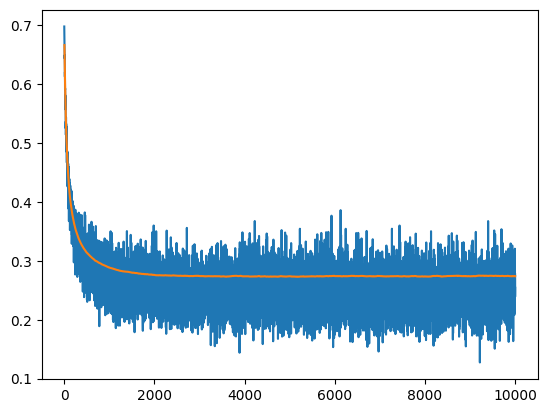

In [0]:
# Nothing to be done, just plot the curves
plt.plot(ite_train,losses_train,label="train")  ## blue
plt.plot(ite_val,losses_val,label="val")  ## yellow

## max(ite) = 2000 epochs * 5 batches

## Just checking the 5 last test data values:

In [0]:
# Nothing to be done here
hat_Y_proba_val=sess.run(_Y_proba,feed_dict={X_:X_val,Y_:Y_val})
hat_Y_proba_val[:5]

array([[0.57],
       [0.68],
       [0.54],
       [1.  ],
       [0.49]], dtype=float32)

## Class prediction: 0.5 thresholding 

In [0]:
hat_Y_val=(hat_Y_proba_val>0.5).astype(int)
print(hat_Y_val[:10].T)  ## prediction
print(Y_val[:10].T)  ## true value

[[1 1 1 1 0 0 1 0 0 1]]
[[1 1 1 1 0 0 1 0 1 0]]


## Compute precision and recall to check how good is the model

In [0]:
from sklearn.metrics import precision_score, recall_score
# Check how to compute the precision score
precision_score(Y_val, hat_Y_val)

0.8571428571428571

In [0]:
# Check how to compute the recall score
recall_score(Y_val, hat_Y_val)

0.9090909090909091

## Let's plot boundary function learned by the model!

(2500, 2)


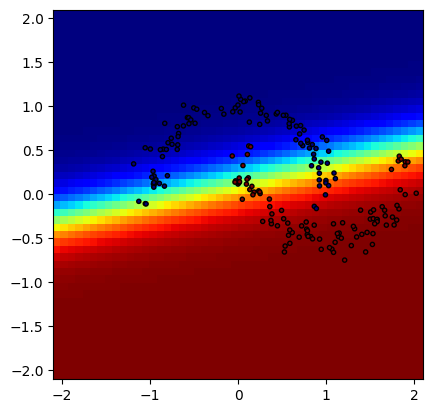

In [0]:
# Nothing to be done here, just show the plot
xx0=np.linspace(-2.1,2.1,50)
xx1=np.linspace(-2.1,2.1,50)
XX0,XX1=np.meshgrid(xx0,xx1)  ## Return coordinate matrices from coordinate vectors.
length=len(XX0.reshape(-1))
XX01=np.stack([XX0.reshape(-1),XX1.reshape(-1)],axis=1)
print(XX01.shape)

hat_Y_proba = sess.run(_Y_proba,feed_dict={X_: XX01})
hat_Y_proba=hat_Y_proba.reshape(XX0.shape)

fig,ax=plt.subplots()
ax.imshow(hat_Y_proba,interpolation="nearest",origin="lower",cmap="jet",extent=[-2.1,2.1,-2.1,2.1])
ax.scatter(X_val[:,0],X_val[:,1],c=Y_val[:,0],cmap="jet",marker=".",edgecolors="k");


***Your turn:*** $(5\heartsuit)$ Create a 2-layer neural network. It only consist in modifying the previous program such as the output function of the model has the following expression: 
$$
\hat p = \sigma\Big(  W'\cdot \mathtt{relu} (W \cdot X +b ) + b' \Big)
$$
où $W$ et $W'$ sont des matrices de paramètres et $b'$ un vecteur de paramètre.

I personnaly tried with 40 hidden neurons (epoch=2000). In that case:

* $W$ will be: 40 lines $\times$ 3 columns
* $W'$ will be: 1 line $\times$ 40 columns

Feel free to try more hidden units, and maybe a 3-layer model...

Help: here is tensorflow relu function: `tf.nn.relu()`

Epoch: 0 	 Loss val: 0.6817041
Epoch: 100 	 Loss val: 0.27401996
Epoch: 200 	 Loss val: 0.2723534
Epoch: 300 	 Loss val: 0.2731792
Epoch: 400 	 Loss val: 0.2729983
Epoch: 500 	 Loss val: 0.27272144
Epoch: 600 	 Loss val: 0.27425852
Epoch: 700 	 Loss val: 0.27335042
Epoch: 800 	 Loss val: 0.27319124
Epoch: 900 	 Loss val: 0.27458897
Epoch: 1000 	 Loss val: 0.2733485
Epoch: 1100 	 Loss val: 0.2757914
Epoch: 1200 	 Loss val: 0.27479902
Epoch: 1300 	 Loss val: 0.27408242
Epoch: 1400 	 Loss val: 0.27668566
Epoch: 1500 	 Loss val: 0.27193224
Epoch: 1600 	 Loss val: 0.27468556
Epoch: 1700 	 Loss val: 0.2749147
Epoch: 1800 	 Loss val: 0.27596015
Epoch: 1900 	 Loss val: 0.27521715
0.8571428571428571
0.9090909090909091
(2500, 2)


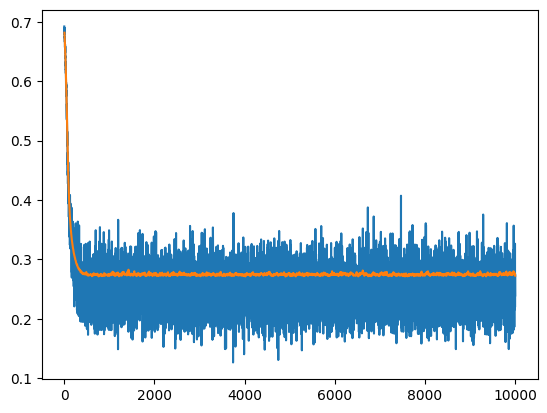

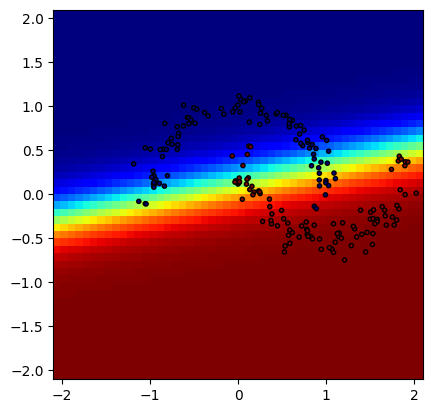

In [0]:
n_inputs = 2
n_hidden = 40

X_ = tf.placeholder(tf.float32, shape=(None, n_inputs))
Y_ = tf.placeholder(tf.float32, shape=(None, 1))

## First layer (hidden layer)
_w1 = tf.Variable(tf.random_uniform([n_inputs, n_hidden], -0.1, 0.1))
_b1 = tf.Variable(0.1)
_logits1 = X_ @ _w1 + _b1
Z_ = tf.nn.relu(_logits1)

## Second layer (output layer)
_w2 = tf.Variable(tf.random_uniform([n_hidden, 1], -0.1, 0.1))
_b2 = tf.Variable(0.1)
_logits2 = Z_ @ _w2 + _b2


## output
_Y_proba = tf.sigmoid(_logits2)  


## define loss function
_loss = tf.losses.log_loss(Y_, _Y_proba)  

## optimization
learning_rate = 0.07
_training_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(_loss)


## small batch
# batch size and number of batches to yield during the training
batch_size = 200
n_batches = m // batch_size

# monitoring things 
losses_val=[]
ite_val=[]
losses_train=[]
ite_train=[]

# Computation graph initialization
sess=tf.Session()
sess.run(tf.global_variables_initializer())
# Starting iteration
ite = 0


# one epoch => see the whole dataset
for epoch in range(2000):
    # loop on every batch in the dataset
    for batch_index in range(n_batches):
        ite += 1
        # get batch data
        X_batch, Y_batch = random_batch(X_train, Y_train, batch_size)
        # training: feed the model with data and extract the monitoring metrics
        _, curr_loss = sess.run([_training_op, _loss], feed_dict = {X_: X_batch, Y_: Y_batch})
        losses_train.append(curr_loss)
        ite_train.append(ite)
        
    # after fitting, we check performances on validation set
    # make the graph compute the validation loss
    loss_val = sess.run(_loss, feed_dict = {X_: X_val, Y_: Y_val})
    ite_val.append(ite)
    losses_val.append(loss_val)
    # just fitting feedback, nothing to be done on this line
    if epoch%100==0 : print("Epoch:", epoch, "\t Loss val:", loss_val)



## plot the curves
plt.plot(ite_train,losses_train,label="train")  ## blue
plt.plot(ite_val,losses_val,label="val")  ## yellow


## Evaluate the performance
from sklearn.metrics import precision_score, recall_score
# precision score
print(precision_score(Y_val, hat_Y_val))

# recall score
print(recall_score(Y_val, hat_Y_val))


# Show the plot
xx0=np.linspace(-2.1,2.1,50)
xx1=np.linspace(-2.1,2.1,50)
XX0,XX1=np.meshgrid(xx0,xx1)  ## Return coordinate matrices from coordinate vectors.
length=len(XX0.reshape(-1))
XX01=np.stack([XX0.reshape(-1),XX1.reshape(-1)],axis=1)
print(XX01.shape)

hat_Y_proba = sess.run(_Y_proba,feed_dict={X_: XX01})
hat_Y_proba=hat_Y_proba.reshape(XX0.shape)

fig,ax=plt.subplots()
ax.imshow(hat_Y_proba,interpolation="nearest",origin="lower",cmap="jet",extent=[-2.1,2.1,-2.1,2.1])
ax.scatter(X_val[:,0],X_val[:,1],c=Y_val[:,0],cmap="jet",marker=".",edgecolors="k");

### multi-class model


In [0]:
# Just a new dataset, nothing to be done
def spiral(N=2000, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K,dtype=np.int32)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    
    return X, y

int32


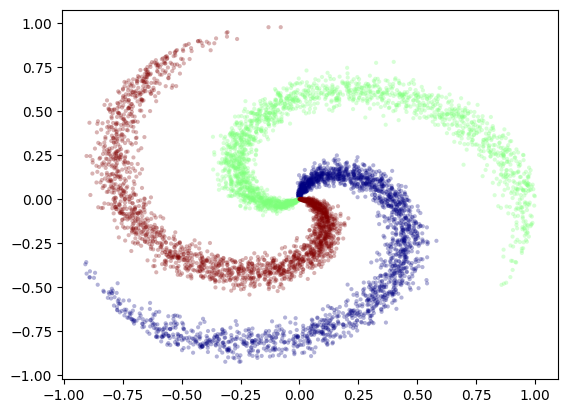

In [0]:
# Plotting the dataset, nothing to be done
X,Y=spiral()
print(Y.dtype)
fig,ax=plt.subplots()
ax.scatter(
      X[:,0],
      X[:,1],
      c=Y[:],
      marker=".", #small points
      alpha=0.3,
      linewidths=0,
      cmap="jet"
  );

In [0]:
n_inputs = 2
n_outputs= 3

X_ = tf.placeholder(tf.float32, shape=(None, n_inputs))
Y_ = tf.placeholder(tf.int32, shape=(None))
#attention, Y_.dtype has to be an integer
Y_one_hot=tf.one_hot(Y_,n_outputs)
## tf.one_hot: Y_ = 1 if Y_ belongs to the first class, until n_outputs(3) classes


_w = tf.Variable(tf.random_uniform([n_inputs, n_outputs], -0.1, 0.1))
_b = tf.Variable(tf.ones([n_outputs]))
_logits = X_ @ _w + _b
_Y_proba = tf.nn.softmax(_logits) 

"""Softmax and crossentropy """

## Softmax is used for multi-classification in logistic regression model
_loss=tf.losses.softmax_cross_entropy(Y_one_hot,_logits)
learning_rate = 0.01
_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
_training_op = _optimizer.minimize(_loss)

In [0]:
batch_size = 200

losses_val=[]
ite_val=[]
losses_train=[]
ite_train=[]

sess=tf.Session()
sess.run(tf.global_variables_initializer())

ite=0

In [0]:
def random_batch(X_train, Y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    Y_batch = Y_train[rnd_indices]
    return X_batch, Y_batch

Using the previous binary classification training procedure, propose your own here (it's almost the same...)

In [0]:
for epoch in range(100):
    for batch_index in range(50):
        ite+=1
        # get batch data
        X_batch, Y_batch = random_batch(X_train, Y_train, batch_size)
        # training: feed the model with data and extract the monitoring metrics
        _, curr_loss = sess.run([_training_op, _loss], feed_dict = {X_: X_batch, Y_: Y_batch})
        losses_train.append(curr_loss)
        ite_train.append(ite)

    # performances on validation set
    loss_val = sess.run(_loss, feed_dict = {X_: X_val, Y_: Y_val})
    ite_val.append(ite)
    losses_val.append(loss_val)
    # and feedback too
    if epoch%10 == 0 : print("epoch:", epoch, "loss:", loss_val)


epoch: 0 loss: 0.9304704
epoch: 10 loss: 0.46674114
epoch: 20 loss: 0.38582024
epoch: 30 loss: 0.35133773
epoch: 40 loss: 0.33164024
epoch: 50 loss: 0.3186047
epoch: 60 loss: 0.3095342
epoch: 70 loss: 0.30317423
epoch: 80 loss: 0.2983809
epoch: 90 loss: 0.29402778


In [0]:
# Nothing to be done here
xx0=np.linspace(-2.1,2.1,50)
xx1=np.linspace(-2.1,2.1,50)
XX0,XX1=np.meshgrid(xx0,xx1)
length=len(XX0.reshape(-1))
XX01=np.stack([XX0.reshape(-1),XX1.reshape(-1)],axis=1)
print(XX01.shape)

hat_Y_proba = sess.run(_Y_proba,feed_dict={X_: XX01})
hat_Y_proba.shape
hat_Y_proba=hat_Y_proba.reshape([50,50,3])
hat_Y=np.argmax(hat_Y_proba,axis=2)
hat_Y.shape

(2500, 2)


(50, 50)

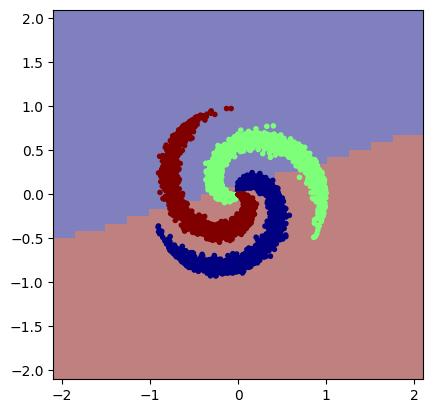

In [0]:
# Again, nothing to be done, just plot the thing and check boundaries
fig,ax=plt.subplots()
ax.imshow(hat_Y,interpolation="nearest",origin="lower",cmap="jet",extent=[-2.1,2.1,-2.1,2.1],alpha=0.5)
ax.scatter(X[:,0],X[:,1],c=Y,cmap="jet",marker=".");

## Working with hidden variables $\hookleftarrow$

In statistics, hidden variables problems are among the most difficult to solve. We are about to deal with a simple one using a tensorflow model. 

The algorithm used here is the EM (=Expectation–maximization).


### The 3 nests problem

Here is the problem: We measure the size of migratory birds' nests of 3 different species. We would like to know the mean diameter for each kind of bird.

Observez le programme ci-dessus. Indiquez par une formule mathématique quel est notre "modèle" de nid $(2\heartsuit)$. 

(1000,)

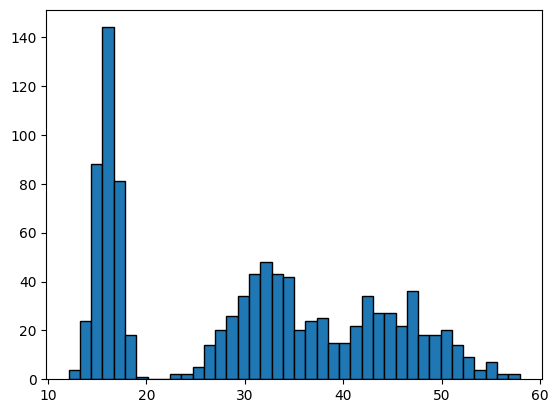

In [0]:
"data generation"
# This function was defined earlier, please do not check the data generation code,
# otherwise you'll know the correct values...
x_train=generate_nid()
plt.hist(x_train,bins=40,edgecolor="k");
x_train.shape

In [0]:
# we define the gaussian functions in tensorflow,
# as well as the likelyhood of observations
def Gauss(x,si):     
    return tf.exp(-0.5* (x/si) **2) /np.sqrt(2*np.pi)/si

def nest_likelyhood(x,mu,si):
    return 1./3*Gauss(x-mu[0],si[0])+1./3*Gauss(x-mu[1],si[1])+1./3*Gauss(x-mu[2],si[2])

In [0]:
# porpose a tensorflow set of parameters to model the mean of the distributions
_mu = tf.Variable(tf.random_uniform([3, 1], 10, 50))
# same thing to model the dispersion of the distribution (sigma)
_si = tf.Variable(tf.random_uniform([3, 1], 1, 14))     ## as np.std(x_train) = 12.53
# input of the model will be single values, nothing to be done
x_ = tf.placeholder(tf.float32,shape=[None])
# a tensor for the likelyhood nothing to be done here
# given samples we compute the likelyhood of the current state of the model
_likelyhood = nest_likelyhood(x_,_mu,_si)

# how bad is the model (we have to maximize the likelyhood)
# nothing to be done on the following lines of this cell
_loss = tf.reduce_mean(-tf.log(_likelyhood))
minimize = tf.train.AdamOptimizer(0.1).minimize(_loss)
# Constraint on the variance, cannot be too large
clip_variance=_si.assign(tf.clip_by_value(_si,1.,5.))

In [0]:
i = 0
nb_step = 200
likelyhood_to_plot = []
steps_to_plot = {1,10,15,50,150}
x_test = np.linspace(0,80,200)

losses = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(nb_step):
        # fill the fitting iteration by providing the graph with the right operations
        sess.run([minimize, _loss], feed_dict = {x_: x_train})
        # monitoring, nothing to be done, we gather validation data at several step of the fitting procedure        
        if step in steps_to_plot:
            mu, si, likelyhood = sess.run([_mu, clip_variance, _likelyhood], feed_dict={x_:x_test})
            likelyhood_to_plot.append(likelyhood)
            print("step:", step,"mu:", mu,"si:", si)


step: 1 mu: [[43.91]
 [49.04]
 [25.  ]] si: [[1.25]
 [5.  ]
 [5.  ]]
step: 10 mu: [[43.64]
 [48.14]
 [24.17]] si: [[2.13]
 [5.  ]
 [5.  ]]
step: 15 mu: [[43.19]
 [47.66]
 [23.69]] si: [[2.6]
 [5. ]
 [5. ]]
step: 50 mu: [[39.16]
 [45.01]
 [20.73]] si: [[5.]
 [5.]
 [5.]]
step: 150 mu: [[32.66]
 [44.05]
 [15.97]] si: [[4.09]
 [5.  ]
 [1.34]]


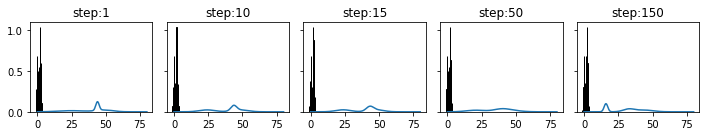

In [0]:
# plot of the validation data while fitting, nothing to be done
nb=len(steps_to_plot)
fig,axs=plt.subplots(1,nb,figsize=(2*nb,2),sharey=True)
for i,step in enumerate(steps_to_plot):
    ax=axs[i]
    ax.set_title("step:"+str(step))
    ax.plot(x_test, likelyhood_to_plot[i])
    ax.hist(x_train, bins=40,edgecolor="k",density=True);

fig.tight_layout()

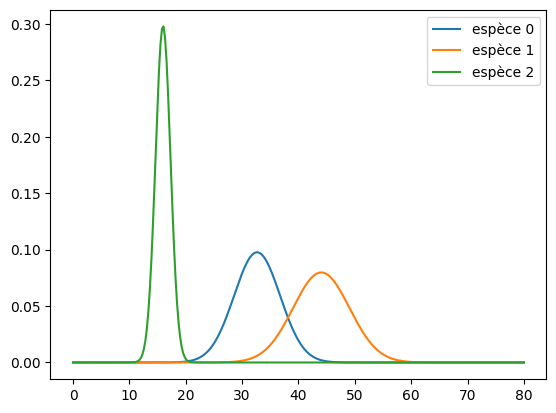

In [0]:
# Again, nothing to be done, it just plots the final nests distribution estimated
def Gauss_np(x,si):     
    return np.exp(-0.5* (x/si) **2) /np.sqrt(2*np.pi)/si

xx=np.linspace(0,80,300)
plt.plot(xx,Gauss_np(xx-mu[0],si[0]),label="espèce 0")
plt.plot(xx,Gauss_np(xx-mu[1],si[1]),label="espèce 1")
plt.plot(xx,Gauss_np(xx-mu[2],si[2]),label="espèce 2")
plt.legend();

### Exo: Throwing darts

$(10\heartsuit)$. 

We have the dart impact of two players (dart throwers). Player A and player B play next to each other on different targets (target of player A is more on the right, the other is on the left). Your mission: 

* find the center of each target
* find the best player (the one that throw darts closest to the center, in average)
* who is throwing more darts ? 

In [0]:
!git clone https://github.com/vincentvigon/assets_neurone.git

Cloning into 'assets_neurone'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 139 (delta 14), reused 29 (delta 9), pack-reused 103
Receiving objects: 100% (139/139), 24.19 MiB | 17.42 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [0]:
x_train = np.loadtxt("assets_neurone/data/flechette.csv")
x_train.shape

(500, 2)

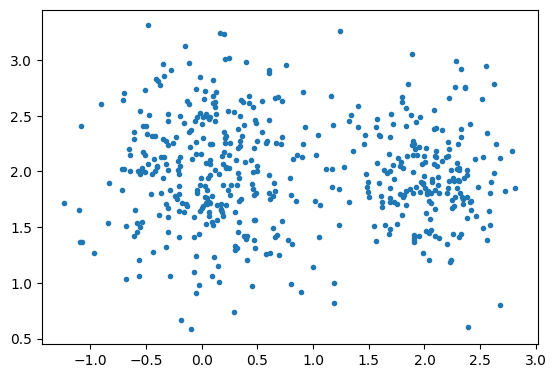

In [0]:
fig,ax=plt.subplots()
ax.plot(x_train[:,0],x_train[:,1],".");
ax.set_aspect("equal")

Help: impacts looks rather isotropic around the center of targets. We can therefore imagine that distributions are simple 2D-gaussians, i.e tensor products of 1D gaussians. Example: 

    (x0,x1) -> Gauss(x0,si)*Gauss(x1,si)


In [0]:
# define likelihood of the observations


def twod_nested_likelihood(x,mu,si):
  #return (1./2*Gauss(x-mu[0,0],si[0,0])+1./2*Gauss(x-mu[0,1],si[0,1]))*(1./2*Gauss(x-mu[1,0],si[1,0])+1./2*Gauss(x-mu[1,1],si[1,1]))
  return (1./2*Gauss(x[:,0]-mu[0,0],si[0,0])+1./2*Gauss(x[:,0]-mu[0,1],si[0,1]))*(1./2*Gauss(x[:,1]-mu[1,0],si[1,0])+1./2*Gauss(x[:,1]-mu[1,1],si[1,1]))

In [0]:
# porpose tensorflow sets of parameters to model the mean of the distributions
_mu = tf.Variable(tf.random_uniform([2, 2], -1, 3))
_si = tf.Variable(tf.random_uniform([2, 2], 0, 2)) # np.std(x_train) = 0.99

# input of the model will be 2-dimentional values
x_ = tf.placeholder(tf.float32,shape=[None,None])
#y_ = tf.placeholder(tf.float32,shape=[None])

# given samples we compute the likelihood of the current state of the model
_likelihood = twod_nested_likelihood(x_,_mu,_si)

# how bad is the model (we have to maximize the likelihood)
_loss = tf.reduce_mean(-tf.log(_likelihood))
minimize = tf.train.AdamOptimizer(0.1).minimize(_loss)
# Constraint on the variance, cannot be too large
clip_variance=_si.assign(tf.clip_by_value(_si,1.,5.))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
i = 0
nb_step = 500
likelihood_to_plot = []
steps_to_plot = {1,10,50,100,200,400}

#test = {'x': np.linspace(-2, 3, 200),
#       'y': np.linspace(0.5, 3.5, 200)}
#x_test = pd.DataFrame(test, columns = ['x', 'y'])


losses = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(nb_step):
        # fill the fitting iteration by providing the graph with the right operations
        #sess.run([minimize, _loss], feed_dict = {x_: x_train[:,0], y_: x_train[:,1]})
        sess.run([minimize, _loss], feed_dict = {x_: x_train})
        # monitoring, nothing to be done, we gather validation data at several step of the fitting procedure        
        if step in steps_to_plot:
            # mu_x0, si_x0, likelihood_x0 = sess.run([_mu[:,0], clip_variance, _likelihood], feed_dict={x_:x_train[:,0]})
            # likelihood_to_plot.append(likelihood_x0)
            # print("step:", step,"mu_x0:", mu_x0,"si_x0:", si_x0)

            mu, si, likelihood = sess.run([_mu, clip_variance, _likelihood], feed_dict = {x_: x_train})
            likelihood_to_plot.append(likelihood)
            print("step:", step,"mu:", mu,"si:", si)



step: 1 mu: [[ 1.96  1.91]
 [-0.19  0.78]] si: [[1.   1.  ]
 [1.28 1.  ]]
step: 10 mu: [[1.34 1.47]
 [0.56 1.48]] si: [[1.62 1.37]
 [1.82 1.38]]
step: 50 mu: [[0.34 1.11]
 [2.09 1.88]] si: [[1.   1.54]
 [1.   1.  ]]
step: 100 mu: [[0.59 1.1 ]
 [2.02 1.93]] si: [[1.   1.43]
 [1.   1.  ]]
step: 200 mu: [[0.56 1.1 ]
 [1.93 2.04]] si: [[1.   1.17]
 [1.   1.  ]]
step: 400 mu: [[0.06 2.  ]
 [1.94 2.03]] si: [[1. 1.]
 [1. 1.]]


The position of the left target is (0.06,2), the position of the right target is (2,2). And we can plot the two targets with radius=0.9 (the radius is chosen randomly just for visualization).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  after removing the cwd from sys.path.


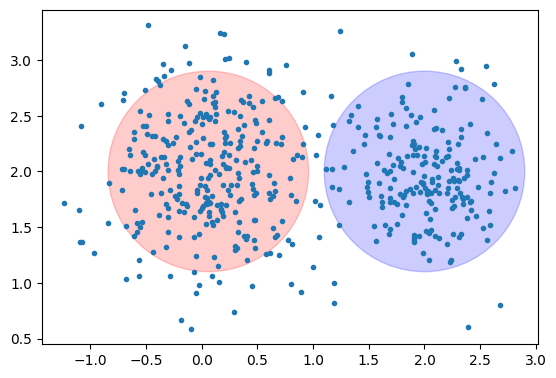

In [0]:
fig,ax=plt.subplots()
ax.plot(x_train[:,0],x_train[:,1],".");
circle1 = plt.Circle((0.06, 2),0.9,edgecolor="red", color = "red", alpha = 0.2)
circle2 = plt.Circle((2,2),0.9, edgecolor="blue", color = "blue", alpha = 0.2)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_aspect("equal")

To calculate which player throws more darts and plays better, we need to identify which dart is thrown by which player. Because both distributions are Gaussian, here we use Gaussian Mixed Models(GMM) to do the clustering.


In [0]:
# generate two 2d gaussian distribution based on the above estimation
from scipy.stats import multivariate_normal
gauss_0=multivariate_normal(mean=[0.06,2.0], cov=[[1.0,0],[0,1.0]])
gauss_1=multivariate_normal(mean=[2.0,2.0], cov=[[1.0,0],[0,1.0]])

# to store the probability of the point belonging to target 1 or target 2
r = np.zeros((len(x_train),2))  

# probability of each data point belongs to Gauss0 and Gauss1
for c,g in zip(range(2),[gauss_0,gauss_1]):
    r[:,c] = g.pdf(x_train)

# normalize the probability so it sums up to 1
for i in range(len(r)):
    r[i] = r[i]/np.sum(r,axis=1)[i]

r.shape
r_val=(r>0.5).astype(int)
num_darts=np.sum(r_val, axis=0)
print("Player 1 has thrown {} darts".format(num_darts[0]) + ", and player 2 has thrown {} darts".format(num_darts[1]) )

Player 1 has thrown 295 darts, and player 2 has thrown 205 darts
